### Combined Models on json Data

#### ML Models Trained on Dataset Labels

##### Importing Necessary Packages and Loading Dataset

In [1]:
import pandas as pd
import nltk 

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_json(path_or_buf='train.jsonl', lines=True)
df.head()

,text,label
0,The project will make a significant contributi...,1
1,"So in -- first of all, the segments, we are --...",0
2,Building a smarter and stronger energy grid th...,0
3,"Generally, first of all our Transmission depar...",0
4,"But for the most part, our challenge is showin...",0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.text.values
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [5]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Dataset_acc_list = []
Dataset_auc_list = []
Dataset_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

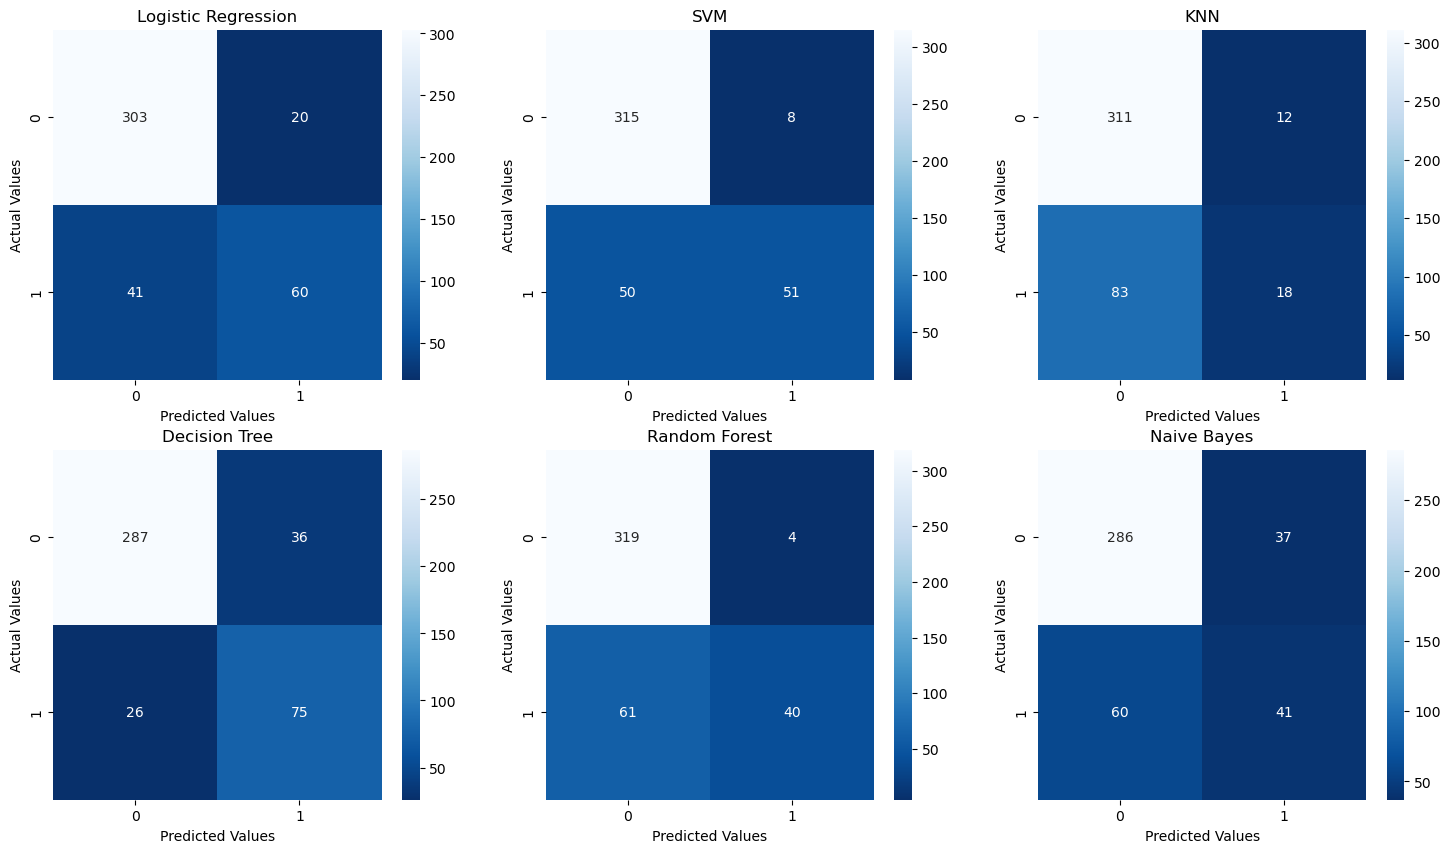

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Dataset_cm_list)):
    cm = Dataset_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [8]:
data_labels_results = pd.DataFrame({'Model':model_list, 'Accuracy':Dataset_acc_list, 'AUC':Dataset_auc_list})
data_labels_results 

,Model,Accuracy,AUC
0,Logistic Regression,0.856132,0.77
1,SVM,0.863208,0.74
2,KNN,0.775943,0.57
3,Decision Tree,0.853774,0.82
4,Random Forest,0.846698,0.69
5,Naive Bayes,0.771226,0.65


#### Training ML Models on VADER Predictions

##### Setting up VADER Predictions

In [9]:
def format_output(output_dict):
    sentiment=False
    if(output_dict['compound']>0):
        sentiment=1
    else:
        sentiment=0
    return sentiment
def predict_sentiment(text):
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# running the predictions
df['vader_prediction']=df['text'].apply(predict_sentiment)
df.sample(5)

,text,label,vader_prediction
1590,And we have a strong certainty that the spendi...,0,1
1945,So we kind of temper fluctuations in earnings ...,0,1
340,Every vehicle is now manufactured in a 36% mor...,1,1
1720,The way to think about it is we have to come t...,0,1
1001,We also made improvements to our terminals ove...,0,1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.text.values
y=df.vader_prediction.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [12]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Vader_acc_list = []
Vader_auc_list = []
Vader_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

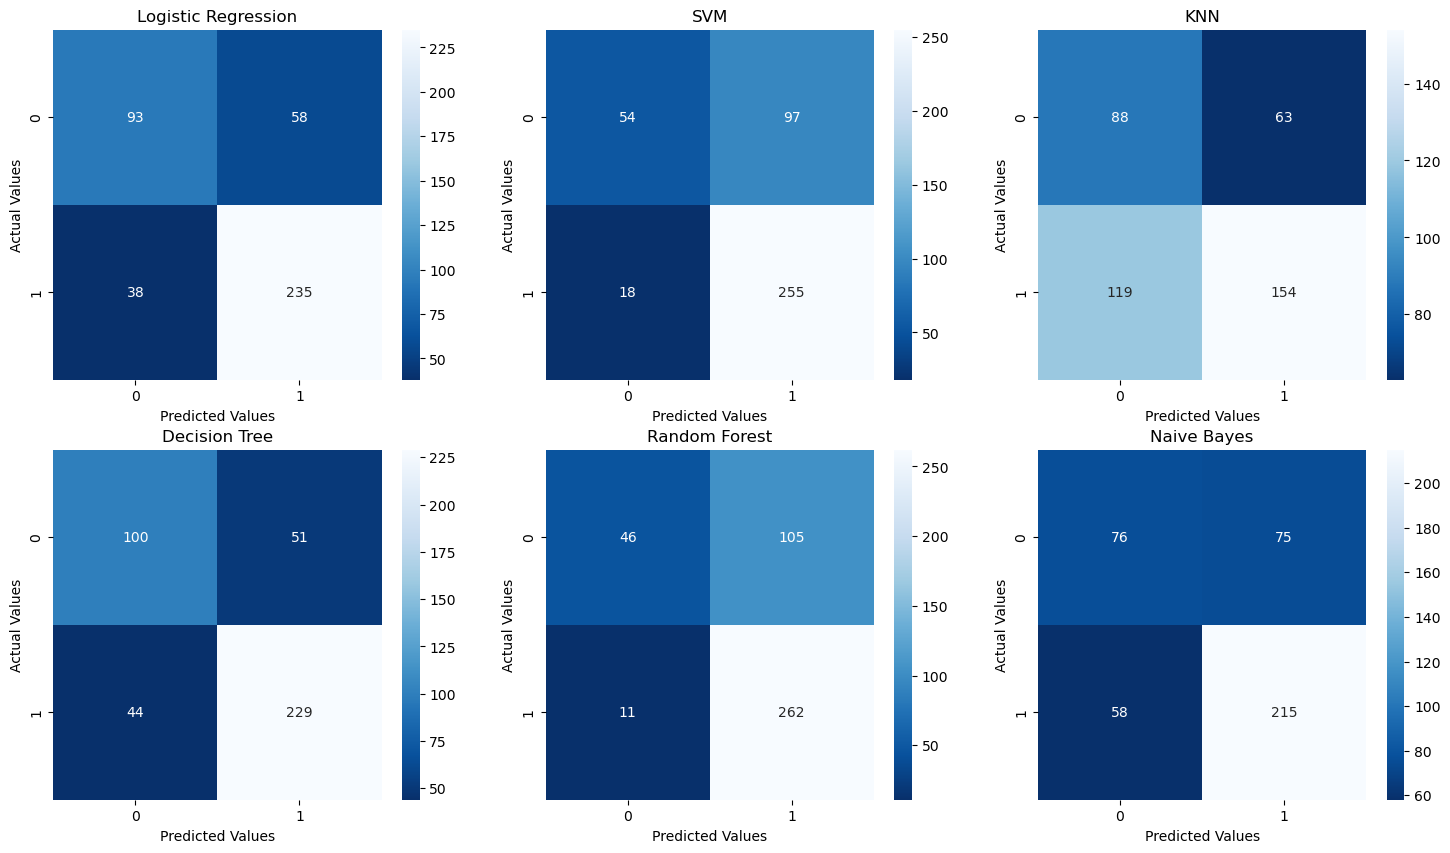

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Vader_cm_list)):
    cm = Vader_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [15]:
VaderML_results = pd.DataFrame({'Model':model_list, 'Accuracy':Vader_acc_list, 'AUC':Vader_auc_list})
VaderML_results

,Model,Accuracy,AUC
0,Logistic Regression,0.773585,0.74
1,SVM,0.728774,0.65
2,KNN,0.570755,0.57
3,Decision Tree,0.775943,0.75
4,Random Forest,0.726415,0.63
5,Naive Bayes,0.686321,0.65


#### Textblob & 6 Machine Learning Models

##### Setting up TextBlob Predictions

In [16]:
from textblob import TextBlob

In [17]:
def sentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['TextBlob_Subjectivity'] =    text['text'].apply(getSubjectivity)
 text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
 def getAnalysis(score):
  if score <= 0:
    return 0
  else:
    return 1
 text ['TextBlob_Analysis'] = text  ['TextBlob_Polarity'].apply(getAnalysis )
 return text

In [18]:
df = sentiment_analysis(df)

In [19]:
df.head()

,text,label,vader_prediction,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,The project will make a significant contributi...,1,1,0.291667,0.125000,1
1,"So in -- first of all, the segments, we are --...",0,0,0.361111,0.166667,1
2,Building a smarter and stronger energy grid th...,0,1,0.550000,0.450000,1
3,"Generally, first of all our Transmission depar...",0,0,0.361667,0.190000,1
4,"But for the most part, our challenge is showin...",0,1,0.500000,0.500000,1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.text.values
y=df.TextBlob_Analysis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [22]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
tb_acc_list = []
tb_auc_list = []
tb_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

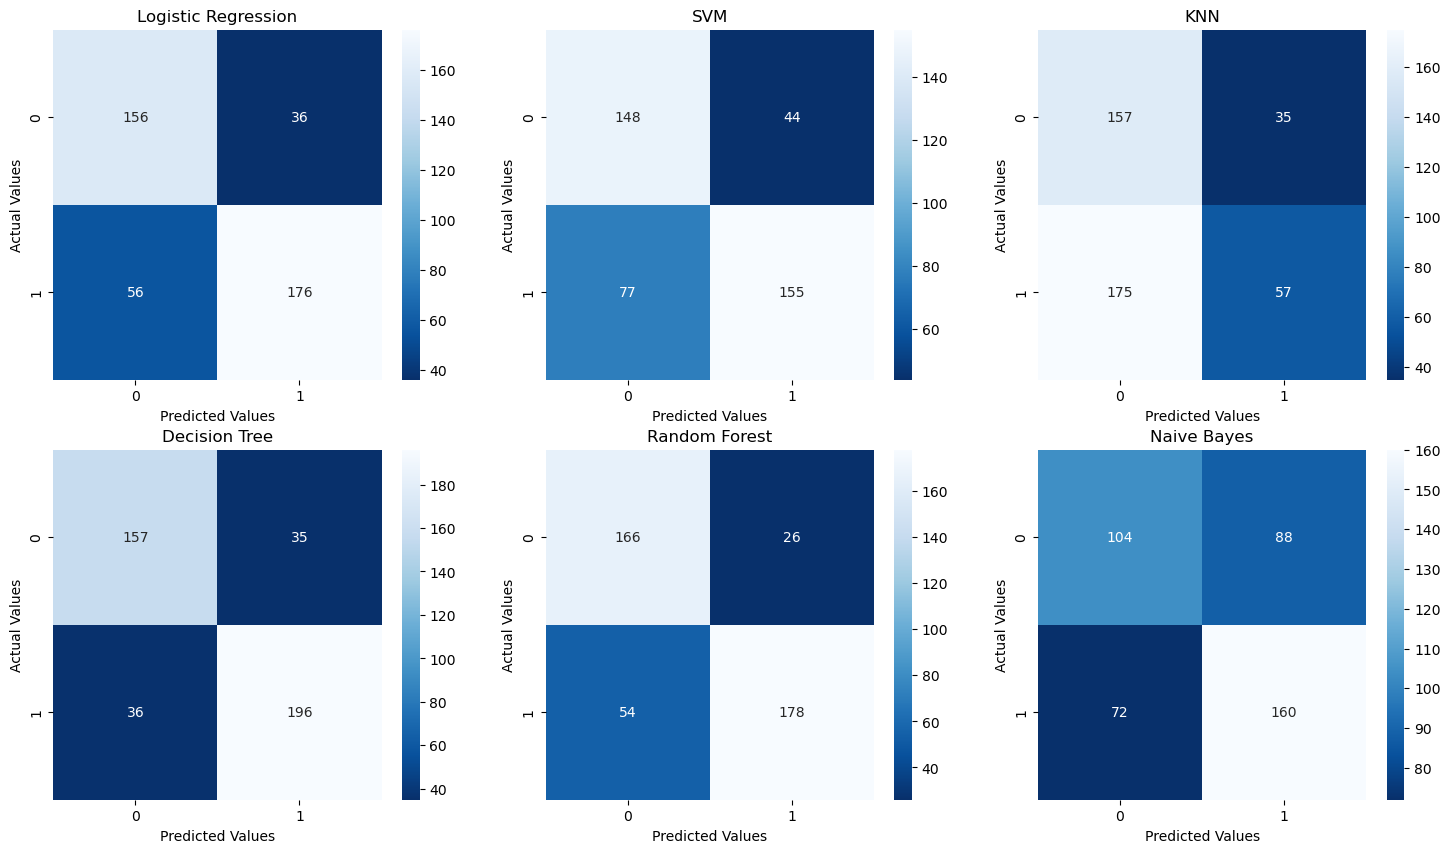

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(tb_cm_list)):
    cm = tb_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [25]:
TBML_results = pd.DataFrame({'Model':model_list, 'Accuracy':tb_acc_list, 'AUC':tb_auc_list})
TBML_results

,Model,Accuracy,AUC
0,Logistic Regression,0.783019,0.79
1,SVM,0.714623,0.72
2,KNN,0.504717,0.53
3,Decision Tree,0.832547,0.83
4,Random Forest,0.811321,0.82
5,Naive Bayes,0.622642,0.62


#### Flair & 6 Machine Learning Models

In [26]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import re

sia = TextClassifier.load('en-sentiment')

In [27]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    else:
        return 0

In [28]:
df['Flair_Sentiment'] = df['text'].apply(lambda x: sentiment_Flair(x))

##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.text.values
y=df.Flair_Sentiment.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [31]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [32]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
f_acc_list = []
f_auc_list = []
f_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

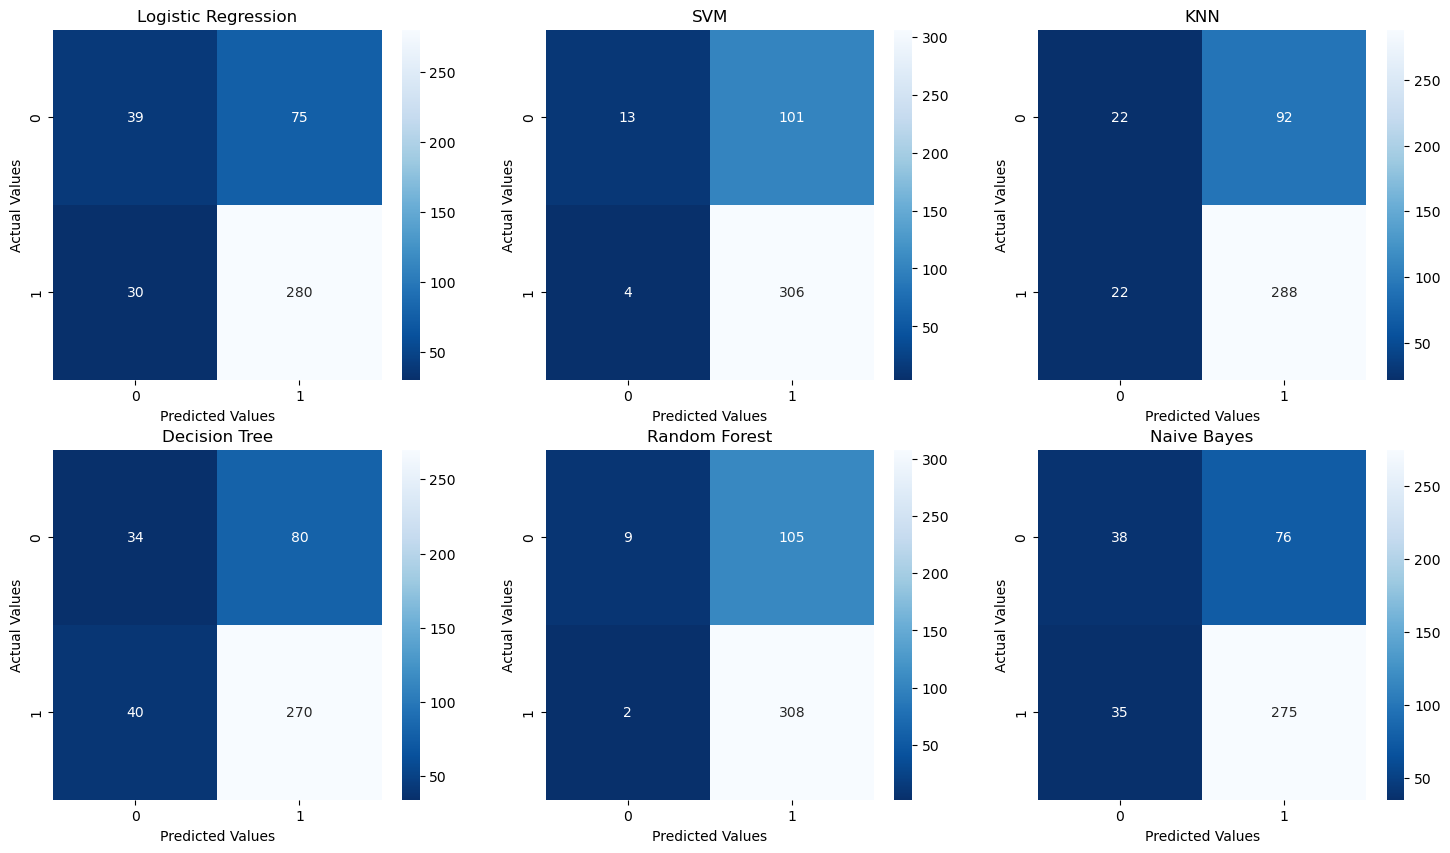

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(f_cm_list)):
    cm = f_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [34]:
FlairML_results = pd.DataFrame({'Model':model_list, 'Accuracy':f_acc_list, 'AUC':f_auc_list})
FlairML_results

,Model,Accuracy,AUC
0,Logistic Regression,0.752358,0.62
1,SVM,0.752358,0.55
2,KNN,0.731132,0.56
3,Decision Tree,0.716981,0.58
4,Random Forest,0.747642,0.54
5,Naive Bayes,0.738208,0.61


#### Final Results Dataframe

In [35]:
all_results = pd.DataFrame({'Model':model_list, 'Dataset Labels Accuracy': Dataset_acc_list, 'VADER Accuracy': Vader_acc_list, 'TextBlob Accuracy': tb_acc_list, 'Flair Accuracy': f_acc_list})
all_results

,Model,Dataset Labels Accuracy,VADER Accuracy,TextBlob Accuracy,Flair Accuracy
0,Logistic Regression,0.856132,0.773585,0.783019,0.752358
1,SVM,0.863208,0.728774,0.714623,0.752358
2,KNN,0.775943,0.570755,0.504717,0.731132
3,Decision Tree,0.853774,0.775943,0.832547,0.716981
4,Random Forest,0.846698,0.726415,0.811321,0.747642
5,Naive Bayes,0.771226,0.686321,0.622642,0.738208
